**Authors:** Elias Köhnlein and Petr Samodelkin, Uni-Heidelberg, Summer Semester 2024



# Re-implementation of the Gaussian elimination algorithm and its applications in *Sage*  



*SageMath* is a powerful tool: it has _a lot_ already built in, and allows you to program on top of that. We are going to showcase both by partly re\-implementing a few linear algebra applications.



## The Gaussian elimination algorithm



The Gaussian elimination algorithm transforms a given matrix to a special form. But first, a linear equation system interlude:
We start with a field $K$ and elements which we'll call numbers in it. We can add, subtract, multiply and divide.
A system of linear equations means we have to substitute numbers from $K$ to satisfy every equation of the form:

\begin{align}
a_{11}x_{1}+a_{12}x_{2}\dots+ a_{1n}x_{n}& =b_{1} \\
a_{21}x_{1}+a_{22}x_{2}\dots+a_{2n}x_{n}  & = b_{2} \\
\dots
\end{align}

To solve it, we first make a few observations:

Observation 1: dropping plus signs and variables preserves information, if we order the variables in every equation first.

Observation 2: if we do one of the elementary operations, namely

a\) swap the rows

b\) add one row to the other

c\) multiply one row by a factor

then the solutions remain the same, which is easy to check. \(Obviously, solutions of the initial system are solutions of the changed one. But inverses of elementary operations are also elementary, so solutions of the changed one are the solutions of the initial one\).

That leads to the Gaussian elimination: an algorithm, that uses elementary operations to bring a matrix to a desirable \(echelon\) form, namely:

We're going to reduce the matrix to the echelon form, like a staircase.
We take the first non-0 column in the matrix, and swap the rows to make sure the top entry in that column isn't 0. Here's basic running through columns.
Then eliminate everything in the column below and above by adding our row, factored first. Repeat for every row. You can see here, why adding rows doesn't mess up the structure: by construction, 0's are to the left.
We're done! You can substitute anything for non-pivot variables, and you'll have exactly one easily obtainable solution per substituted set, it's as easy as moving the free variable entries to the right and adding up. 



### Source code


In [2]:
def gaussian_elimination_sage(A):
    M = Matrix(A)  # Convert list of lists A into a Sage matrix if not already a matrix
    num_rows, num_cols = M.nrows(), M.ncols()

    for row in range(num_rows):
        pivot_col = -1

        for col in range(num_cols):
            for i in range(row, num_rows):
                if M[i, col] != 0:
                    pivot_col = col
                    M.swap_rows(row, i)  # Swap to move pivot to the current row
                    break
            if pivot_col >= 0:
                break  

        if pivot_col == -1:
            return M

        pivot = M[row, pivot_col]
        for i in range(row + 1, num_rows):
            if M[i, pivot_col] != 0:
                factor = M[i, pivot_col] / pivot 
                M.add_multiple_of_row(i, row, -factor)

    return M

def full_gaussian_elimination_sage(A):
    M = Matrix(A) 
    num_rows, num_cols = M.nrows(), M.ncols()

    for row in range(min(num_rows, num_cols)):
        pivot_col = -1

        for col in range(num_cols):
            for i in range(row, num_rows):
                if M[i, col] != 0:
                    pivot_col = col
                    M.swap_rows(row, i)  
                    break
            if pivot_col >= 0:
                break  

        if pivot_col == -1:
            return M
        # show(M)
        
        pivot = M[row, pivot_col]
        M.rescale_row(row, 1 / pivot)

        # Eliminate all entries above and below the pivot
        for i in range(num_rows):
            if i != row and M[i, pivot_col] != 0:
                factor = M[i, pivot_col]
                M.add_multiple_of_row(i, row, -factor)

    return M


# Example usage
B = Matrix(QQ, [
    [1,2,3],
    [1,2,4],
    [4,5,6]
])

print("Original Matrix:")
show(B)

# Perform full Gaussian Elimination
rref_matrix = full_gaussian_elimination_sage(B)

print("Reduced Row Echelon Form:")
show(rref_matrix)
print("Sage-implemented Reduced Row Echelon Form:")
show(B.echelon_form())


# Perform Gaussian Elimination
upper_triangular = gaussian_elimination_sage(B)

print("Upper Triangular Form:")
show(upper_triangular)


Original Matrix:


[1 2 3]
[1 2 4]
[4 5 6]

Reduced Row Echelon Form:


[1 0 0]
[0 1 0]
[0 0 1]

Sage-implemented Reduced Row Echelon Form:


[1 0 0]
[0 1 0]
[0 0 1]

Upper Triangular Form:


[ 1  2  3]
[ 0 -3 -6]
[ 0  0  1]

## The Gaussian elimination: user input cell 



In [7]:
#function version test 

# Input matrix from the user
print("Enter the elements of the matrix separated by spaces (row-wise):")
rows = int(input("Enter the number of rows: "))
cols = int(input("Enter the number of columns: "))
print("Enter the elements seperated by a space:")
A = []
for i in range(rows):
    row = list(map(float, input().split()))
    if len(row) != cols:
        print("Number of elements in each row should be equal to the number of columns.")
        exit()  # Terminates the program if the input is invalid
    A.append(row)

# Convert the list of lists to a Sage matrix
B = Matrix(QQ, A)

print("Original Matrix:")
show(B)

# Perform full Gaussian Elimination
rref_matrix = full_gaussian_elimination_sage(B)

print("Reduced Row Echelon Form:")
show(rref_matrix)
print("Sage-implemented")
show(B.echelon_form())


# Perform Gaussian Elimination
upper_triangular = gaussian_elimination_sage(B)

print("Upper Triangular Form:")
show(upper_triangular)


Enter the elements of the matrix separated by spaces (row-wise):


Enter the number of rows:  2

Enter the number of columns:  2

Enter the elements seperated by a space:


 1 4

Original Matrix:


[   7/5 123/10]
[     1      4]

Reduced Row Echelon Form:


[1 0]
[0 1]

Sage-implemented


[1 0]
[0 1]

Upper Triangular Form:


[   7/5 123/10]
[     0 -67/14]

### This code enables the user to test the speed of our implementation of the Gauss algorithm. It generates a "random" nxn matrix with entries ranging from \-100 to 100.1 2 



In [8]:
import random

# Function to generate a random row of given size
def generate_random_row(size):
    return [random.randint(-100, 100) for _ in range(size)]

print("Enter the size (n) of the quadratic matrix n x n:")
size = min(30, int(input("Enter a natural number defaults to 30 if above 30: ")))

# Generate the 20x20 matrix with random entries
B = Matrix(QQ, [generate_random_row(size) for _ in range(size)])


print("Original Matrix:")
show(B)

# Perform full Gaussian Elimination
rref_matrix = full_gaussian_elimination_sage(B)

print("Reduced Row Echelon Form:")
show(rref_matrix)
print("Sage-implemented Reduced Row Echelon Form:")
show(B.echelon_form())


# Perform Gaussian Elimination
upper_triangular = gaussian_elimination_sage(B)

print("Upper Triangular Form:")

show(upper_triangular)


Enter the size (n) of the quadratic matrix n x n:


Enter a natural number defaults to 30 if above 30:  30

Original Matrix:


30 x 30 dense matrix over Rational Field (use the '.str()' method to see the entries)

Reduced Row Echelon Form:


30 x 30 dense matrix over Rational Field (use the '.str()' method to see the entries)

Sage-implemented Reduced Row Echelon Form:


30 x 30 dense matrix over Rational Field (use the '.str()' method to see the entries)

Upper Triangular Form:


30 x 30 dense matrix over Rational Field (use the '.str()' method to see the entries)

## Finding the inverse of a matrix



Yet another fun observation: if we insert another column on the right to our system,  $(a_{1\ n+1}, a_{2\ n+1} \dots)^{T}$, the algorithm will treat it exactly as the previous column: after reducing the matrix to the echelon form, the column will have the solutions of the equation system with the same coefficients, but with different values, namely $(a_{1\ n+1}, a_{2\ n+1} \dots)^{T}$, to the right of the "=".  Which means, we can solve any number of linear equation systems with the same coefficients at once. 
Since with one vector to the right, system solves $Ax=b$, then with many vectors to the right, we'll be able to solve to $AX=B$, where $B$ has several columns. If we realise only $A^{-1}$ solves $AX=I$, there's our algorithm to find the inserve! A pretty magic one.
$$
\left(
\begin{array}{cccc|ccc}
a_{11} & a_{12} & \dots  & a_{1n}  &  &   \\
 &  & \dots &  &    &  \Huge{I} \\
a_{m1} & a_{m2} & \dots  & a_{mn} & &  &   \\
\end{array}
\right) \underbrace{ \rightarrow }_{ \text{Gaussian elimination} }
\left(
\begin{array}{ccc|ccc}
  & \\
 &  \Huge{I} &  &  & \Huge{A^{-1}}  &  \\
 &  &  &  & 
\end{array}
\right)
$$



In [9]:
B = matrix(QQ, [
    [5, 5,4],
    [1, 10, -1],
    [0, 2, 0]
])
def inverse(B):
    M=matrix(B)
    print("This is the Matrix we want to calculate the inverse for: ")
    show(B)
    M = M.augment(matrix.identity(M.nrows()), subdivide = "True")
    print("So Let's add I on the right side of our Matrix")
    show(M)
    M = full_gaussian_elimination_sage(M)
    print("Now look what's on the right side of our Matrix in echelon form!")
    show(M)
    return M[:, M.nrows():]

def inverse_without_print(B):
    M=matrix(B)
    M = M.augment(matrix.identity(M.nrows()))
    M = full_gaussian_elimination_sage(M)
    return M[:, M.nrows():]


inverse(B)
print("The default method agrees:")
show(B^(-1))

print("So now we know that: ")
show(B,"*",inverse_without_print(B),"=",B*inverse_without_print(B))

This is the Matrix we want to calculate the inverse for: 


[ 5  5  4]
[ 1 10 -1]
[ 0  2  0]

So Let's add I on the right side of our Matrix


[ 5  5  4| 1  0  0]
[ 1 10 -1| 0  1  0]
[ 0  2  0| 0  0  1]

Now look what's on the right side of our Matrix in echelon form!


[   1    0    0| 1/9  4/9 -5/2]
[   0    1    0|   0    0  1/2]
[   0    0    1| 1/9 -5/9  5/2]

The default method agrees:


[ 1/9  4/9 -5/2]
[   0    0  1/2]
[ 1/9 -5/9  5/2]

So now we know that: 


[ 5  5  4]
[ 1 10 -1]
[ 0  2  0] '*' [ 1/9  4/9 -5/2]
[   0    0  1/2]
[ 1/9 -5/9  5/2] '=' [1 0 0]
[0 1 0]
[0 0 1]

# Finding the row span of a matrix

If we continue our wonderful streak of observations, we can make another one: elementary column operations don't change the linear dependence. It's easy to see how non\-zero rows in echelon form are linearly independent, which means, you can take the pivot rows of the echelon form, which form a basis of it's space! 



Original matrix:


[1 2]
[2 3]
[1 1]


Matrix after Gaussian elimination:


[1 0]
[0 1]
[0 0]


Basis of the vector space:


(1, 0)

(0, 1)

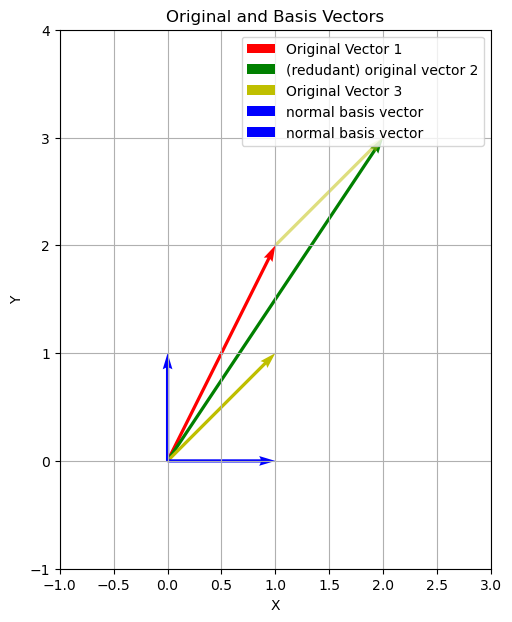

Vector space of dimension 2 over Rational Field


[1 0]
[0 1]

In [18]:
import matplotlib.pyplot as plt
from sage.modules.free_module_element import vector
from sage.plot.arrow import arrow2d

# Define the vectors
v1 = vector([1, 2])
v2 = vector([2, 3])
v3 = vector([1, 1])

# Create a matrix from the vectors
A = matrix([v1, v2, v3])

# Print the original matrix
print("Original matrix:")
show(A)

# Perform Gaussian elimination
A_rref = full_gaussian_elimination_sage(A)

# Print the matrix after Gaussian elimination
print("\nMatrix after Gaussian elimination:")
show(A_rref)

# Extract the basis vectors from the row echelon form
basis_vectors = [A_rref.row(i) for i in range(A_rref.nrows()) if A_rref.row(i).norm() != 0]

# Print the basis vectors
print("\nBasis of the vector space:")
for vec in basis_vectors:
    show(vec)

# Plot the original vectors and the basis vectors

# Create a figure
plt.figure(figsize=(7, 7))

# Plot original vectors
plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='r', label='Original Vector 1')
plt.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='g', label='(redudant) original vector 2')
plt.quiver(0, 0, v3[0], v3[1], angles='xy', scale_units='xy', scale=1, color='y', label='Original Vector 3')
plt.quiver(v1[0], v1[1], v3[0], v3[1], angles='xy', scale_units='xy', scale=1, color='y', alpha=0.5)

# Plot basis vectors
for v in basis_vectors:
    plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='b', label='normal basis vector')
    
# Set plot limits and labels
plt.xlim([-1, 3])
plt.ylim([-1, 4])
plt.xlabel('X')
plt.ylabel('Y')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.grid(True)
plt.title("Original and Basis Vectors")

# Show the plot
plt.show()

#Sage implemented 
# Create a vector space from the rows of the original matrix
V = VectorSpace(QQ, A.ncols())
print(V)
show(Matrix(V.basis()))


# Calculating the determinant



Another intersting application for the Gauß algorithm is to find the determinant of an matrix.

The steps are:

1. Start with a square matrix.

2. Use Gaussian elimination to transform the matrix into upper triangular form, while keeping track of any row swaps.

3. Multiply the diagonal elements of the upper triangular matrix.

4. If you swapped rows during Gaussian elimination, multiply the result by \-1 for each swap.

5. The final result is the determinant of the original matrix.

Important to note: If we multiply a certain row or column of a matrix 𝐴 by some scalar 𝜆 \-&gt; then determinant of 𝐴 changes to 𝜆|𝐴|.


In [5]:
from sage.rings.integer_ring import ZZ

def gaussian_elimination_sage(A):
    M = Matrix(A)  # Convert list of lists A into a Sage matrix if not already a matrix
    num_rows, num_cols = M.nrows(), M.ncols()
    
    num_row_swaps = 0
    
    for row in range(num_rows):
        pivot_col = -1

        for col in range(num_cols):
            for i in range(row, num_rows):
                if M[i, col] != 0:
                    pivot_col = col
                    M.swap_rows(row, i)
                    num_row_swaps += 1  # Not in the implementation of the beginning
                    break
            if pivot_col >= 0:
                break  

        if pivot_col == -1:
            return M

        pivot = M[row, pivot_col]
        for i in range(row + 1, num_rows):
            if M[i, pivot_col] != 0:
                factor = M[i, pivot_col] / pivot 
                M.add_multiple_of_row(i, row, -factor)

    # Step 2: Multiply the diagonal elements of the upper triangular matrix
    det = ZZ(1) 
    for i in range(num_rows):
        det *= M[i, i]

    # Step 3: Adjust for the number of row swaps
    if num_row_swaps % 2 == 1:
        det *= ZZ(-1)

    return M, det


C = Matrix(QQ, [
    [0, 1, 1],
    [1, 1, 0],
    [1, 0, 1],
])

print("Original Matrix:")
show(Matrix(C))

# Perform Gaussian Elimination
upper_triangular, det = gaussian_elimination_sage(C)

print("Upper Triangular Form:")
show(upper_triangular)

print("Determinant by our Algorithm:", det)
print("Determinant by Sage:", C.det())

Original Matrix:


[0 1 1]
[1 1 0]
[1 0 1]

Upper Triangular Form:


[1 1 0]
[0 1 1]
[0 0 2]

Determinant by our Algorithm: -2
Determinant by Sage: -2


## Fascinating History of Gaussian Elimination:

https://www.ams.org/notices/201106/rtx110600782p.pdf 



Sources: 

- https://scoop.iwr.uni-heidelberg.de/teaching/2024ss/lecture-lineare-algebra/
- Э. Б. Вимберг "Курс алгебры"

